# K-means & Hierarchical Clustering
- A client wants to understand the customers like who can be their customers with whom whey can start marketing (easy to converse, target sutomers) so that is can be given to the marketing team and plan the strategy accordingly.
- K-means is unsupervised learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('https://tinyurl.com/MyClusteringData')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## K-mean algorithm
1. sepcify the number k of clusters to assign
2. randomly initialize k centroids
3. repeat 
4. expectationL assign each point to its closest centroid 
5. maximization: compute the new centroid (mean) of each cluster
6. until the centroid position do not change

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
data.columns=['ID', 'Gender', 'Age', 'Income', 'Spending Score' ]

In [6]:
data.head()

,ID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.shape
#there are total 200 customers 

(200, 5)

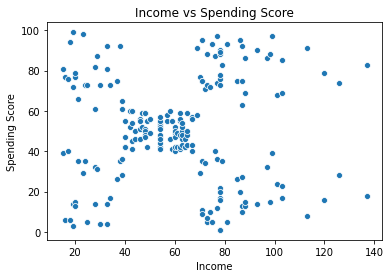

In [49]:
sns.scatterplot(data=data, x='Income', y='Spending Score')
plt.title('Income vs Spending Score')
plt.show()

In [9]:
#from yellowbrick.cluster import KElbowVisualizer

In [10]:
#!pip install yellowbrick

In [11]:
#model=KMeans()
#visualizer=KElbowVisualizer(model, k=(1,8))

(array([18.,  6., 12., 10., 12., 16., 14., 24., 12., 18., 22., 14.,  2.,
         6.,  6.,  0.,  2.,  2.,  2.,  2.]),
 array([ 15. ,  21.1,  27.2,  33.3,  39.4,  45.5,  51.6,  57.7,  63.8,
         69.9,  76. ,  82.1,  88.2,  94.3, 100.4, 106.5, 112.6, 118.7,
        124.8, 130.9, 137. ]),
 <a list of 20 Patch objects>)

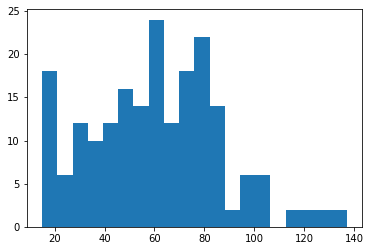

In [12]:
plt.hist(data['Income'], bins=20)

In [13]:
data.iloc[:,3:]

,Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


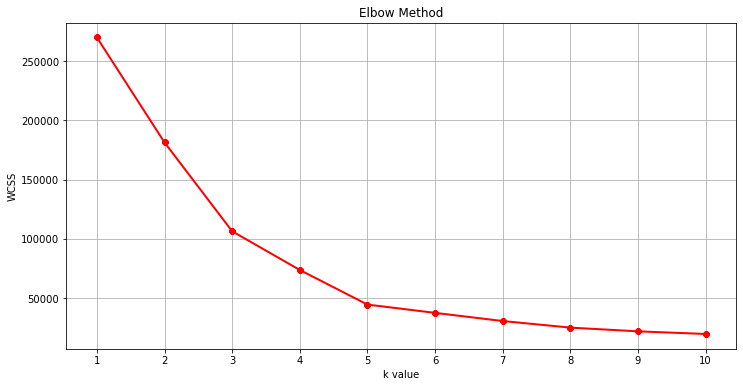

In [15]:
#plot within cluster sum of squres (WCSS) against the number of clusters (K)
#to figure out the optimal number of clusters 
#from the previous scatter plot, I assume there are five clusters
#lets see using the Elboe Method 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.title('Elbow Method')
plt.show()

The optimal K value is 5 from Elbow method. This align to our previous observations.

In [34]:
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,
             random_state=0)
X=data.iloc[:,3:]
pred_y=kmeans.fit_predict(X)
#k-means++ ensures that you don't get into the random initialization trap

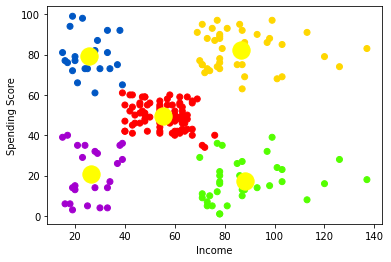

In [45]:
plt.scatter('Income', 'Spending Score', data=X, c=pred_y, cmap='prism')
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=300, c='yellow')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

From K-mean clustering, we can segment customers into 5 groups
1. low income with low spending score (purple)
2. high income with low spending score (green)
3. middle income with middle spending score (red)
4. low income with high spending score (blue)
5. high income with high spending score (yellow)

Advice:
1. 

# Hierachical Clustering

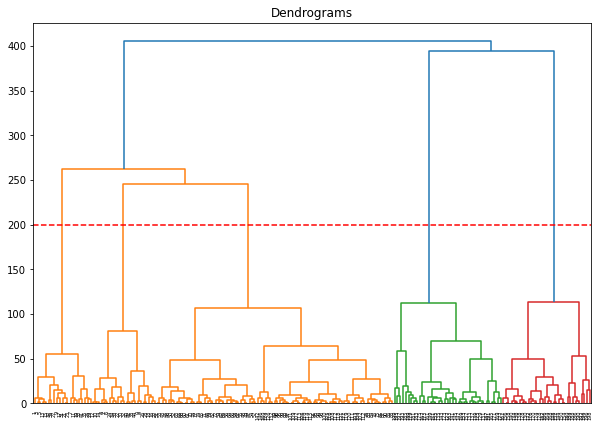

In [48]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=200, color='r', linestyle='--')
plt.show()